# Pre-processing - making the dataset 

In [1]:
# -*- coding: utf-8 -*-


import os
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Disclaimer. Images are taken from the ImageCEF collaboration from [give link here]()

Plain black-and-white (two level) images should never be converted to JPEG; they violate all of the conditions given above. You need at least about 16 grey levels before JPEG is useful for grey-scale images. It should also be noted that GIF is lossless for grey-scale images of up to 256 levels, while JPEG is not.

In [2]:
input_filepath = "/Users/ericleijonmarck/dev/dicommunify/data/raw/ImageData.csv"
output_filepath = "/Users/ericleijonmarck/dev/dicommunify/data/processed/prep_imagedata.csv"

In [3]:
df = pd.read_csv(input_filepath, header=None, delimiter=";", names=["image", "class"],encoding='utf-8')

In [4]:
df["class"].unique()

array(['Body', 'Head-Neck', 'Lower-Limb', 'Upper-Limb', 'True-Negative'], dtype=object)

#### Classes
We have now made it possible to attach each image to it's corresponding class

Body - the body of human

Head-Neck - Head and neck

Lower-limb - the lower part of a human body

Upper-limb - upper part of a human body

True-Negative - Image taken with the same x-ray camera that contains non-body parts are considered as true negative.


In [5]:
df.head()

,image,class
0,10.1224.176.125.112.16.201109071451150.jpeg,Body
1,10.1224.176.125.112.16.201109071557120.1.jpeg,Body
2,10.1224.176.125.112.16.201109081127120.1.jpeg,Body
3,10.1224.176.125.112.16.201109081127121.1.jpeg,Body
4,10.1224.176.125.112.16.20110908123224.4.jpeg,Body


In [6]:
df.to_csv(output_filepath,sep=',',index=False, encoding='utf-8')

# strip whitespaces

In [7]:
df["image"] = df["image"].map(str.strip)

In [8]:
raw_storage = '/users/ericleijonmarck/dev/dicommunify/data/raw/Image_Downscaled/'

In [9]:
import matplotlib.image as img
image = img.imread(raw_storage + str(df['image'][200]))

FileNotFoundError: [Errno 2] No such file or directory: '/users/ericleijonmarck/dev/dicommunify/data/raw/Image_Downscaled/1116.1234.158.1128.123.14.201109201049180.jpeg'

In [99]:
image.shape

(1189, 1600, 3)

In [100]:
image[0,0,:]

array([0, 0, 0], dtype=uint8)

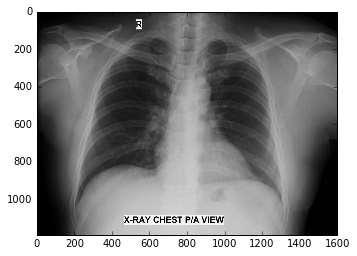

In [101]:
plt.imshow(image)

## Convert image filenames into np.arrays

In [102]:
df['image'] = df['image'].map(img.imread)

In [103]:
dimen = []
for i in range(len(df['image'])):
    dimen.append(df['image'][i].shape[0])
max(dimen)

In [105]:
df.head()

,image,class
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Body
1,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",Body
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Body
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Body
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Body


### Since the y labels cannot be strings it has to be in int

In [106]:
df_class = df['class']

In [81]:
class_dict = {'Body' : 0, 'Head-Neck': 1, 'Lower-Limb' : 2, 'Upper-limb' : 3, 'True-Negative' : 4}

In [82]:
class_dict['Body']

1

In [87]:
def change_label_to_int(df):
    for i in range(len(df)):
        print(i)
        if df['class'][i] == 'Body':
            df['class'][i] = class_dict['Body']
        if df['class'][i] == 'Head-Neck':
            df['class'][i] = class_dict['Head-Neck']
        if df['class'][i] == 'Lower-Limb':
            df['class'][i] = class_dict['Lower-Limb']
        if df['class'][i] == 'Upper-Limb':
            df['class'][i] = class_dict['Upper-Limb']
        if df['class'][i] == 'True-Negative':
            df['class'][i] = class_dict['True-Negative']
    return df

In [107]:
df['class'] = df['class'].map(change_label_to_int)

0


TypeError: string indices must be integers

## Creating the hdf5 data for saving the dataset

In [21]:
import h5py
f = h5py.File('../data/myTest.hdf5','w')

In [ ]:
# make a dict of the different sizes of the images
